In [23]:
import tensorflow as tf
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2


from tensorflow.keras.utils import Sequence

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
TRAIN_PATH = '/LV-heart'
TEST_PATH = '/LV-heart'

In [27]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1

In [28]:
# Combine the directory paths with the main TRAIN_PATH

# train_img = os.path.join(TRAIN_PATH, '/MRI')
# train_label = os.path.join(TRAIN_PATH, '/MASKS')
train_img = '/LV-heart/MRI'
train_label = '/LV-heart/MASKS'

# Get a list of filenames in the data and label directories
train_img_ids = os.listdir(train_img)
train_label_ids = os.listdir(train_label)

X_train = np.zeros((len(train_img_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_label_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [32]:
# Combine the directory paths with the main TRAIN_PATH
test_img = '/LV-heart/MASKS'
test_label = '/LV-heart/MASKS'

# Get a list of filenames in the data and label directories
test_img_ids = os.listdir(test_img)
test_label_ids = os.listdir(test_label)

X_test = np.zeros((len(test_img_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_label_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [33]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_img_ids), total=len(train_img_ids)):
    img = imread(os.path.join(train_img, id_))
    img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
    X_train[n] = img_resized.astype(np.uint8)
    
for n, id_ in tqdm(enumerate(train_label_ids), total=len(train_label_ids)):
    mask = imread(os.path.join(train_label, id_))
    mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
    Y_train[n] = mask_resized.astype(np.uint8)

Resizing training images and masks


100%|██████████| 805/805 [00:02<00:00, 277.20it/s]


In [34]:
print('Resizing testing images and masks')
for n, id_ in tqdm(enumerate(test_img_ids), total=len(test_img_ids)):
    img = imread(os.path.join(test_img, id_))
    img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
    X_test[n] = img_resized.astype(np.uint8)
    # img_norm=((np.array(img_resized) - np.mean(img_resized)) / np.std(img_resized))
    # X_test[n] = img_norm.astype(np.uint8)

for n, id_ in tqdm(enumerate(test_label_ids), total=len(test_label_ids)):
    mask = imread(os.path.join(test_label, id_))
    mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
    # Y_test[n] = mask_resized.astype(bool)
    Y_test[n] = mask_resized.astype(np.uint8)
    # mask_norm=((np.array(mask_resized) - np.mean(mask_resized)) / np.std(mask_resized))
    # Y_test[n] = mask_norm.astype(bool)

Resizing testing images and masks


100%|██████████| 805/805 [00:02<00:00, 282.23it/s]


In [ ]:
# AUGMENTATION_FACTOR = 1

# class DataGenerator(Sequence):
#     def __init__(self, label_ids, img_ids, path):
#         self.path = path
#         self.img_ids = img_ids
#         self.label_ids = label_ids

#     def __len__(self):
#         return len(self.img_ids)

#     def __getitem__(self, index):
#         img_id = self.img_ids[index]
#         label_id = self.label_ids[index]

#         X = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#         Y = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

#         img = imread(os.path.join(self.path, 'img', img_id))
#         img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
#         X[0] = img_resized.astype(np.uint8)

#         mask = imread(os.path.join(self.path, 'labelcol', label_id))
#         mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
#         Y[0] = mask_resized.astype(bool)

#         return X, Y

# # Initialize your data generator
# datagen = DataGenerator(train_label_ids, train_img_ids, TRAIN_PATH)

# # Initialize arrays for augmented data
# X_augmented = np.zeros((len(train_label_ids) * AUGMENTATION_FACTOR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_augmented = np.zeros((len(train_img_ids) * AUGMENTATION_FACTOR, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

# print('Augmenting training images and masks')

# augmented_idx = 0
# for n in tqdm(range(len(datagen)), total=len(datagen)):
#     X_batch, Y_batch = datagen[n]  # Generate augmented data using DataGenerator
#     X_augmented[augmented_idx:augmented_idx + AUGMENTATION_FACTOR] = X_batch
#     Y_augmented[augmented_idx:augmented_idx + AUGMENTATION_FACTOR] = Y_batch
#     augmented_idx += AUGMENTATION_FACTOR


In [ ]:
# # Concatenate the original and augmented data
# print('Orignal Images : ', len(X_train))
# X_train = np.concatenate((X_train, X_augmented), axis=0)
# Y_train = np.concatenate((Y_train, Y_augmented), axis=0)
# print('Augmented Images Images : ', len(X_train))


In [ ]:
# AUGMENTATION_FACTOR = 1

# class DataGenerator(Sequence):
#     def __init__(self, label_ids, img_ids, path):
#         self.path = path
#         self.img_ids = img_ids
#         self.label_ids = label_ids

#     def __len__(self):
#         return len(self.img_ids)

#     def mirror_image(self, image):
#         return np.flip(image, axis=1)

#     def __getitem__(self, index):
#         img_id = self.img_ids[index]
#         label_id = self.label_ids[index]

#         X = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#         Y = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

#         img = imread(os.path.join(self.path, 'img', img_id))
#         img_mirrored = self.mirror_image(img)
#         img_resized = resize(img_mirrored, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
#         X[0] = img_resized.astype(np.uint8)

#         mask = imread(os.path.join(self.path, 'labelcol', label_id))
#         mask_mirrored = self.mirror_image(mask)
#         mask_resized = resize(mask_mirrored, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
#         Y[0] = mask_resized.astype(bool)

#         return X, Y

# # Initialize your data generator
# datagen = DataGenerator(train_label_ids, train_img_ids, TRAIN_PATH)

# # Initialize arrays for augmented data
# X_augmented = np.zeros((len(train_label_ids) * AUGMENTATION_FACTOR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_augmented = np.zeros((len(train_img_ids) * AUGMENTATION_FACTOR, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

# print('Augmenting training images and masks')

# augmented_idx = 0
# for n in tqdm(range(len(datagen)), total=len(datagen)):
#     X_batch, Y_batch = datagen[n]  # Generate augmented data using DataGenerator
#     X_augmented[augmented_idx:augmented_idx + AUGMENTATION_FACTOR] = X_batch
#     Y_augmented[augmented_idx:augmented_idx + AUGMENTATION_FACTOR] = Y_batch
#     augmented_idx += AUGMENTATION_FACTOR


In [ ]:
# # Concatenate the original and augmented data
# print('Orignal Images : ', len(X_train))
# X_train = np.concatenate((X_train, X_augmented), axis=0)
# Y_train = np.concatenate((Y_train, Y_augmented), axis=0)
# print('Augmented Images Images : ', len(X_train))

In [ ]:
# from scipy.ndimage import rotate

# AUGMENTATION_FACTOR = 1

# class DataGenerator(Sequence):
#     def __init__(self, label_ids, img_ids, path):
#         self.path = path
#         self.img_ids = img_ids
#         self.label_ids = label_ids

#     def __len__(self):
#         return len(self.img_ids)

#     def rotate_image(self, image, angle):
#         return rotate(image, angle, reshape=False)

#     def __getitem__(self, index):
#         img_id = self.img_ids[index]
#         label_id = self.label_ids[index]

#         X = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#         Y = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

#         img = imread(os.path.join(self.path, 'img', img_id))
#         img_rotated = self.rotate_image(img, 45)
#         img_resized = resize(img_rotated, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
#         X[0] = img_resized.astype(np.uint8)

#         mask = imread(os.path.join(self.path, 'labelcol', label_id))
#         mask_rotated = self.rotate_image(mask, 45)
#         mask_resized = resize(mask_rotated, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
#         Y[0] = mask_resized.astype(bool)

#         return X, Y

# # Initialize your data generator
# datagen = DataGenerator(train_label_ids, train_img_ids, TRAIN_PATH)

# # Initialize arrays for augmented data
# X_augmented = np.zeros((len(train_label_ids) * AUGMENTATION_FACTOR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_augmented = np.zeros((len(train_img_ids) * AUGMENTATION_FACTOR, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

# print('Augmenting training images and masks')

# augmented_idx = 0
# for n in tqdm(range(len(datagen)), total=len(datagen)):
#     X_batch, Y_batch = datagen[n]  # Generate augmented data using DataGenerator
#     X_augmented[augmented_idx:augmented_idx + AUGMENTATION_FACTOR] = X_batch
#     Y_augmented[augmented_idx:augmented_idx + AUGMENTATION_FACTOR] = Y_batch
#     augmented_idx += AUGMENTATION_FACTOR


In [ ]:
# # Concatenate the original and augmented data
# print('Orignal Images : ', len(X_train))
# X_train = np.concatenate((X_train, X_augmented), axis=0)
# Y_train = np.concatenate((Y_train, Y_augmented), axis=0)
# print('Augmented Images Images : ', len(X_train))

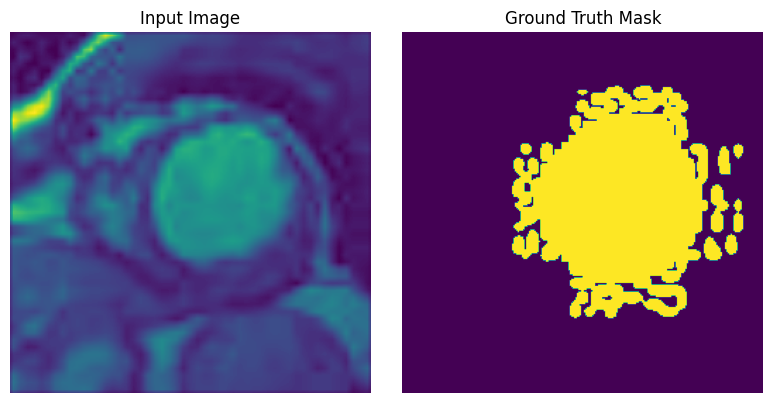

In [54]:
# Sanity check on random training samples
image_x = random.randint(0, len(X_train))
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(X_train[image_x])
axs[0].set_title('Input Image')
axs[0].axis('off')

axs[1].imshow(np.squeeze(Y_train[image_x]))
axs[1].imshow(np.squeeze(Y_train[image_x]))
axs[1].set_title('Ground Truth Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [36]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [37]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=40, callbacks=callbacks)

####################################

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.1):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

Epoch 1/40


2024-03-15 09:43:56.979489: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-15 09:43:57.778905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 0.4735 - accuracy: 0.8036

2024-03-15 09:44:24.664023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 29s 268ms/step - loss: 0.4735 - accuracy: 0.8036 - val_loss: 0.3849 - val_accuracy: 0.8172
Epoch 2/40
91/91 [==============================] - 23s 253ms/step - loss: 0.2950 - accuracy: 0.8462 - val_loss: 0.2626 - val_accuracy: 0.8933
Epoch 3/40
91/91 [==============================] - 23s 251ms/step - loss: 0.2493 - accuracy: 0.8929 - val_loss: 0.2520 - val_accuracy: 0.8857
Epoch 4/40
91/91 [==============================] - 23s 251ms/step - loss: 0.2288 - accuracy: 0.9039 - val_loss: 0.2645 - val_accuracy: 0.8998
Epoch 5/40
91/91 [==============================] - 22s 246ms/step - loss: 0.1972 - accuracy: 0.9186 - val_loss: 0.1710 - val_accuracy: 0.9273
Epoch 6/40
91/91 [==============================] - 22s 245ms/step - loss: 0.1631 - accuracy: 0.9312 - val_loss: 0.1621 - val_accuracy: 0.9318
Epoch 7/40
91/91 [==============================] - 23s 248ms/step - loss: 0.1509 - accuracy: 0.9349 - val_loss: 0.1392 - val_accuracy: 0.9374
Epoch 8/40

2024-03-15 09:54:30.560951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 6s 229ms/step


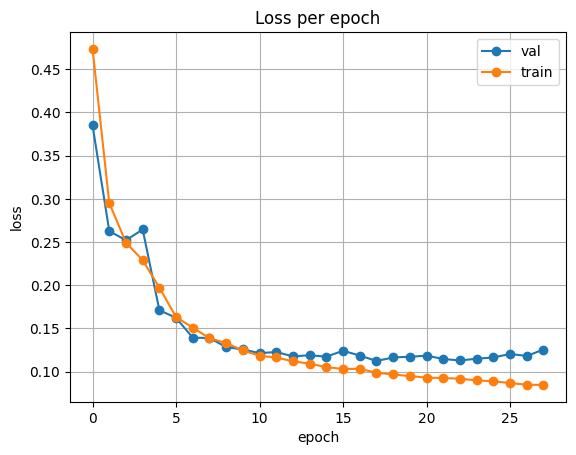

In [38]:
def plot_loss(history):
    plt.plot(history.history['val_loss'], label='val', marker='o')
    plt.plot( history.history['loss'], label='train', marker='o')
    plt.title('Loss per epoch'); plt.ylabel('loss');
    plt.xlabel('epoch')
    plt.legend(), plt.grid()
    plt.show()
plot_loss(results)

In [45]:
model.save("/Volumes/MyData/Asma Naseer/Python/UNetHeartLV.h5")

In [55]:
TEST_PATH = '/Volumes/MyData/Asma Naseer/Python/LV-heart'
test_img = train_img #'/Users/asmanaseer/Downloads/cmr/images'
test_label = train_img #'/Users/asmanaseer/Downloads/cmr/masks'

# Get a list of filenames in the data and label directories
test_img_ids = os.listdir(test_img)
test_label_ids = os.listdir(test_label)

X_test = np.zeros((len(test_img_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_label_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
print('Resizing testing images and masks')
for n, id_ in tqdm(enumerate(test_img_ids), total=len(test_img_ids)):
    img = imread(os.path.join(test_img, id_))
    img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
    X_test[n] = img_resized.astype(np.uint8)
    # img_norm=((np.array(img_resized) - np.mean(img_resized)) / np.std(img_resized))
    # X_test[n] = img_norm.astype(np.uint8)

for n, id_ in tqdm(enumerate(test_label_ids), total=len(test_label_ids)):
    mask = imread(os.path.join(test_label, id_))
    mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
    # Y_test[n] = mask_resized.astype(bool)
    Y_test[n] = mask_resized.astype(np.uint8)
    # mask_norm=((np.array(mask_resized) - np.mean(mask_resized)) / np.std(mask_resized))
    # Y_test[n] = mask_norm.astype(bool)

Resizing testing images and masks


100%|██████████| 805/805 [00:02<00:00, 291.42it/s]


In [56]:
model =  tf.keras.models.load_model("UNetHeartLV")
prediction = model.predict(X_test, verbose=1)


2024-03-15 12:09:34.541729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 7s 268ms/step


In [57]:
# preds_train = model.predict(X_train[:int(X_train.shape[0]*0.8)], verbose=1)
# preds_val = model.predict(X_train[int(X_train.shape[0]*0.2):], verbose=1)
# preds_test = model.predict(X_test, verbose=1)

threshold=0.1
preds_train_t = (preds_train > threshold).astype(np.uint8)
preds_val_t = (preds_val > threshold).astype(np.uint8)
preds_test_t = (preds_test > threshold).astype(np.uint8)

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    dice = (2.0 * intersection) / (union + 1e-6)  # Adding a small constant to avoid division by zero
    return dice

def accuracy(y_true, y_pred):
    correct_pixels = np.sum(np.equal(y_true, y_pred))
    total_pixels = y_true.size
    acc = correct_pixels / total_pixels
    return acc

accuracy_train = accuracy(Y_train[:int(Y_train.shape[0]*0.8)], preds_train_t)
accuracy_val = accuracy(Y_train[int(Y_train.shape[0]*0.2):], preds_val_t)
accuracy_test = accuracy(Y_test, preds_test_t)

dice_train = dice_coefficient(Y_train[:int(Y_train.shape[0]*0.8)], preds_train_t)
dice_val = dice_coefficient(Y_train[int(Y_train.shape[0]*0.2):], preds_val_t)
dice_test = dice_coefficient(Y_test, preds_test_t)

# print("Dice_Coeffcient Train:",dice_train)
# print("Dice_Coeffcient Val:",dice_val)
print("Dice_Coeffcient Test:",dice_test)

# print("accuracy Train:",accuracy_train)
# print("accuracy Val:",accuracy_train)
print("accuracy Test:",accuracy_train)


ValueError: operands could not be broadcast together with shapes (644,256,256,1) (724,256,256,1) 

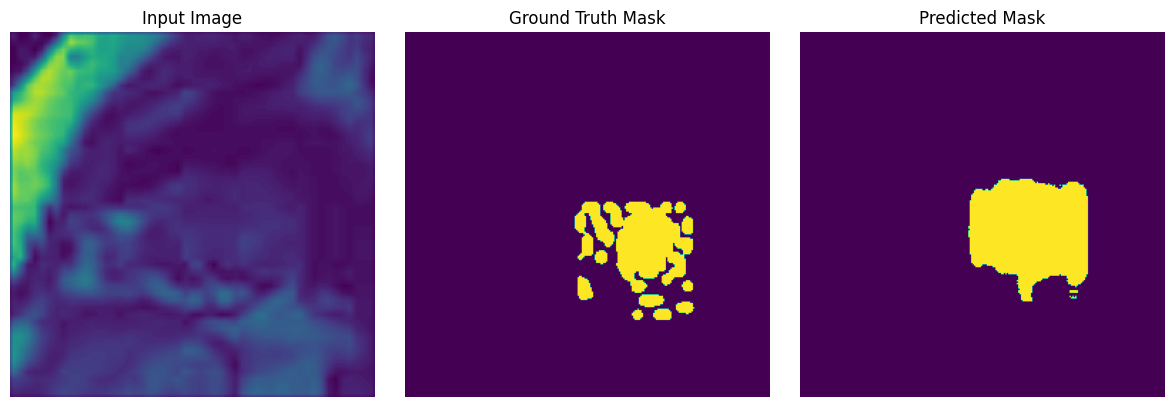

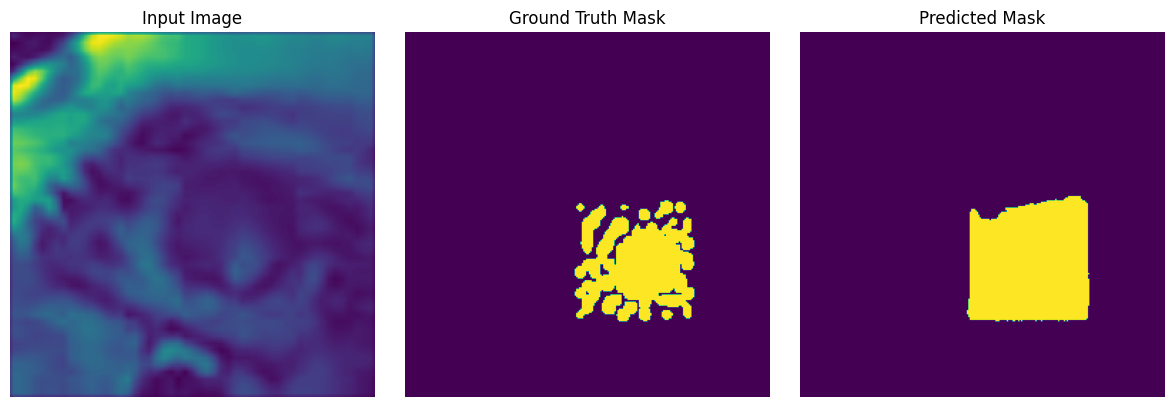

In [69]:
# Sanity check on random training samples
ix = random.randint(0, len(preds_train_t))
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(X_train[ix])
axs[0].set_title('Input Image')

axs[1].imshow(np.squeeze(Y_train[ix]))
axs[1].set_title('Ground Truth Mask')

axs[2].imshow(np.squeeze(preds_train_t[ix]))
axs[2].set_title('Predicted Mask')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Sanity check on random validation samples
# Sanity check on random training samples
ix = random.randint(0, len(preds_train_t))
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(X_train[ix])
axs[0].set_title('Input Image')

axs[1].imshow(np.squeeze(Y_train[ix]))
axs[1].set_title('Ground Truth Mask')

axs[2].imshow(np.squeeze(preds_train_t[ix]))
axs[2].set_title('Predicted Mask')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


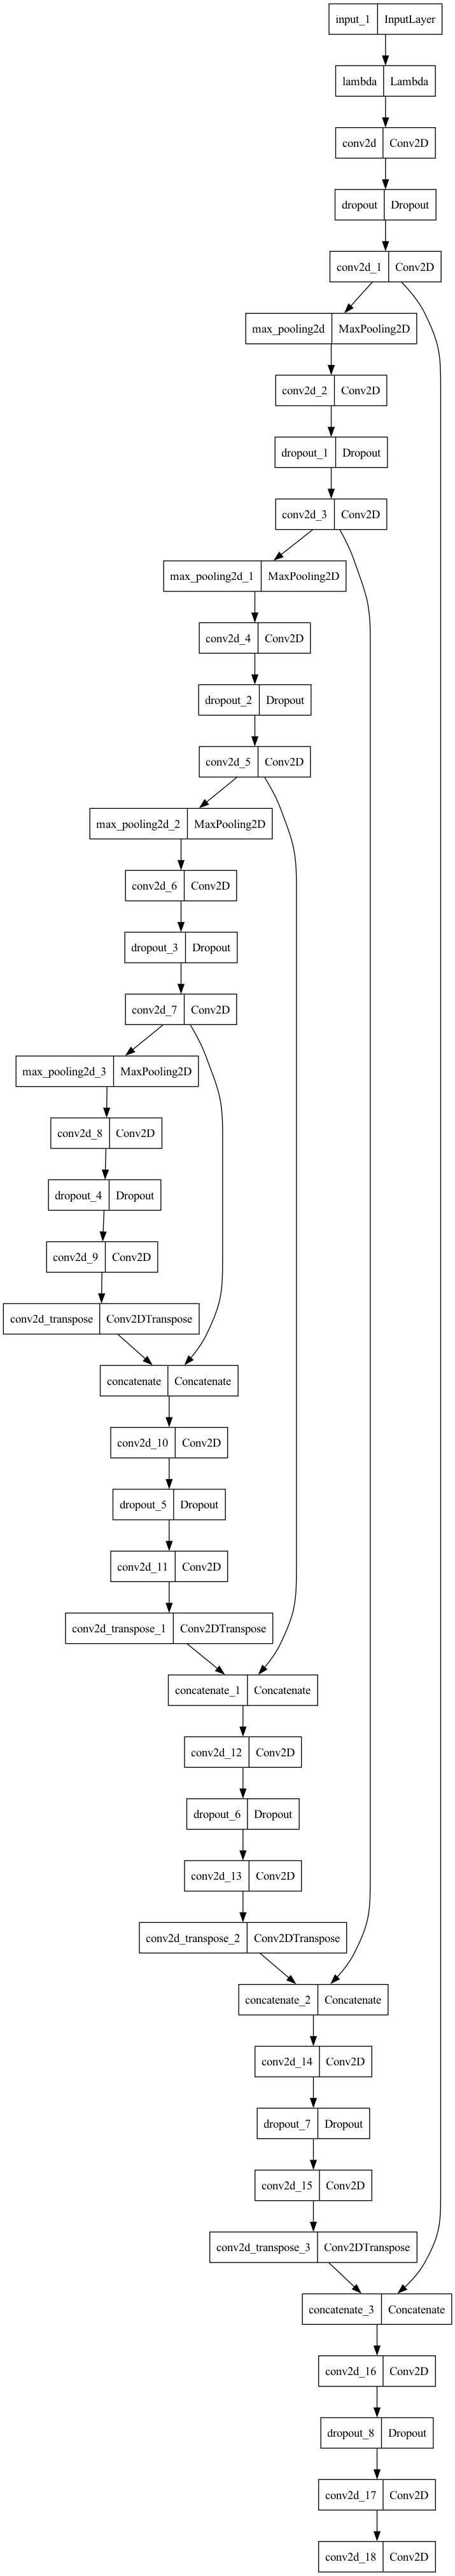

In [ ]:
# !pip install pydot
# !brew install graphviz
tf.keras.utils.plot_model(model, "model.png", show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

Defaulting to user installation because normal site-packages is not writeable


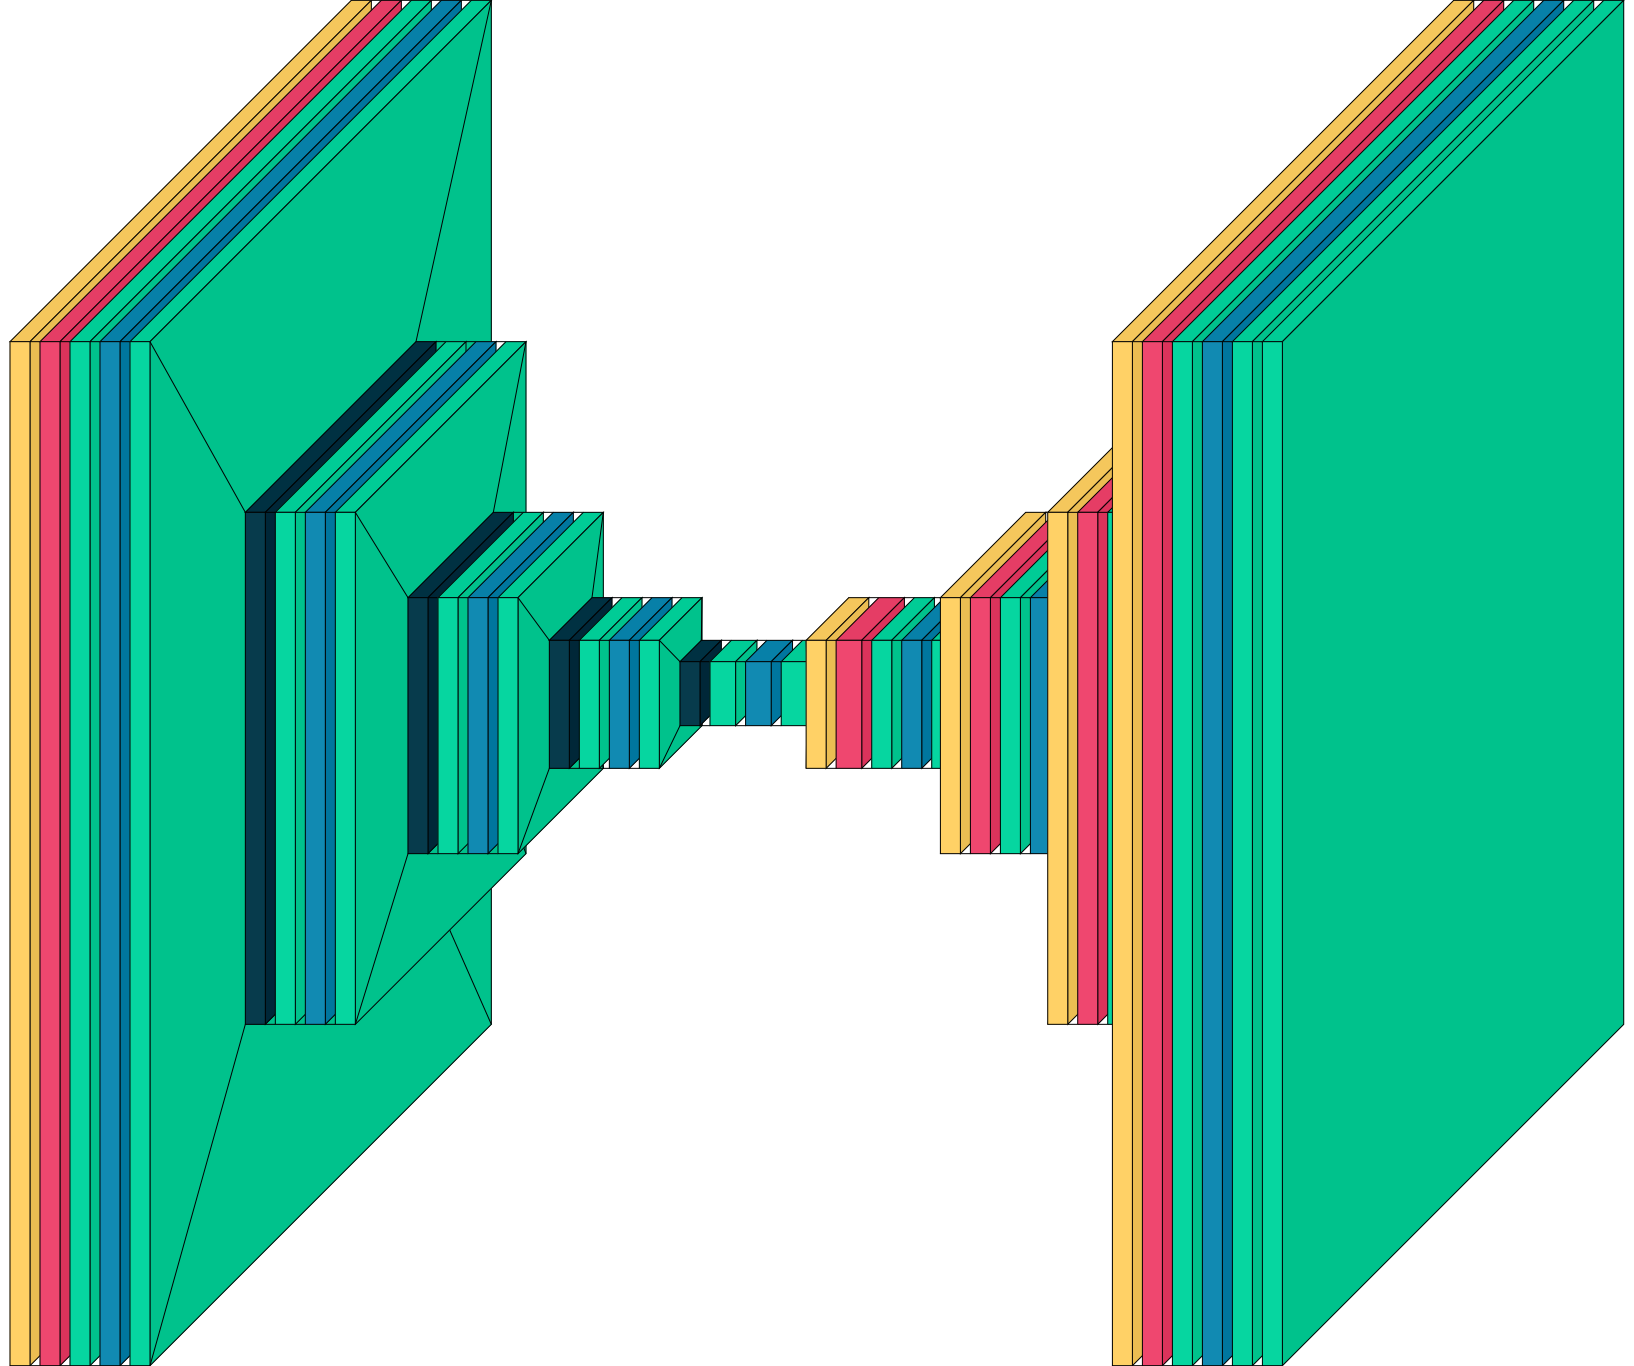

In [70]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)